In [9]:
import csv
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib inline

DATA_PATH = './data/collect'
CSV_FILENAME = '/driving_log.csv'
CSV_COL_NAMES = ['center','left','right','steering','throttle','brake','speed']

samples = []

with open(DATA_PATH + CSV_FILENAME) as f:
    reader = csv.reader(f)
    for line in reader:
        # cleanse spaces in the data
        line = list(map(lambda str: str.strip(), line))
        samples.append(line)

# remove the column names
del samples[0]

print("Number of samples in Udacity's training set: ", len(samples))

print(samples[0])

Number of samples in Udacity's training set:  2889
['/Users/jianjieliu/Documents/Udacity/term1/projects/CarND-Behavioral-Cloning/data/collect/IMG/center_2018_06_09_21_31_52_412.jpg', '/Users/jianjieliu/Documents/Udacity/term1/projects/CarND-Behavioral-Cloning/data/collect/IMG/left_2018_06_09_21_31_52_412.jpg', '/Users/jianjieliu/Documents/Udacity/term1/projects/CarND-Behavioral-Cloning/data/collect/IMG/right_2018_06_09_21_31_52_412.jpg', '0', '1', '0', '2.726714']


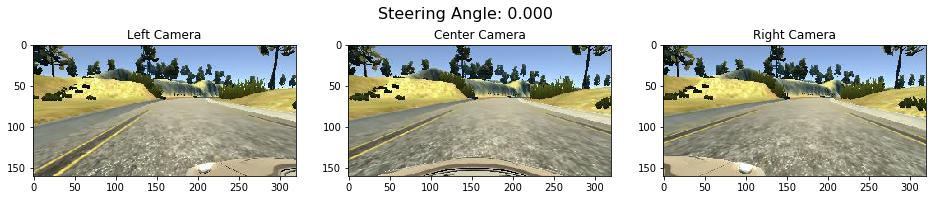

In [10]:
def get_example_images(samples):
    img_set = {}
    i = random.randint(0, len(samples))
    center = name = DATA_PATH + '/IMG/' + samples[i][0].split('/')[-1]
    left   = name = DATA_PATH + '/IMG/' + samples[i][1].split('/')[-1]
    right  = name = DATA_PATH + '/IMG/' + samples[i][2].split('/')[-1]
    img_set['center'] = plt.imread(center)
    img_set['left']   = plt.imread(left)
    img_set['right']  = plt.imread(right)
    steering = np.float(samples[i][3])
        
    return img_set, steering

img, steering = get_example_images(samples)

fig = plt.figure(figsize=(16,3))
plt.suptitle('Steering Angle: {:.3f}'.format(steering), fontsize=16)
ax1 = fig.add_subplot(131)
ax1.set_title("Left Camera")
plt.imshow(img['left'])
ax2 = fig.add_subplot(132)
ax2.set_title("Center Camera")
plt.imshow(img['center'])
ax3 = fig.add_subplot(133)
ax3.set_title("Right Camera")
plt.imshow(img['right'])
# fig.savefig('./img/example_img.jpg')
plt.show()

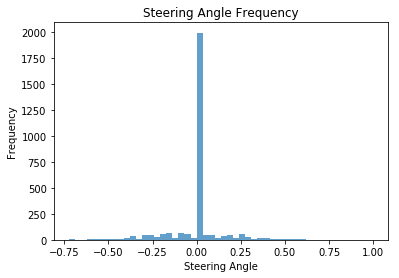

In [11]:
measurement = [np.float(row[3]) for row in samples[1:]]
measurement[4]
num_bins = 50
n, bins, patches = plt.hist(measurement, num_bins, alpha=.7)
plt.title('Steering Angle Frequency')
plt.ylabel('Frequency')
plt.xlabel('Steering Angle')
# plt.savefig('./img/data_freq.jpg')
plt.show()

Number of times an event with 50% chance over 100 interval happened:  39


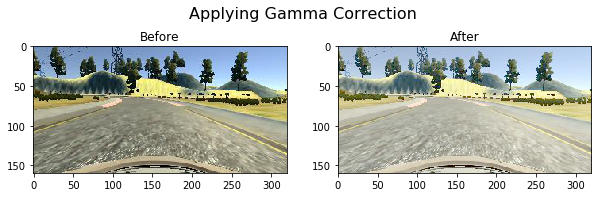

In [12]:
# Test data augmentation strategies
import dataAugment as da

def compare_img(orig, new, fig_title, size=None):
    fig = plt.figure(figsize=size)
    plt.suptitle(fig_title, fontsize=16)
    ax1 = fig.add_subplot(121)
    ax1.set_title("Before")
    plt.imshow(orig)
    ax2 = fig.add_subplot(122)
    ax2.set_title("After")
    plt.imshow(new)
    plt.show()

# Test da.happens()
success = 0
for i in range(100):
    if da.happens(.5):
        success += 1

print("Number of times an event with 50% chance over 100 interval happened: ", success)

# Test da.rand_gamma()
img, steering = get_example_images(samples)
result_img, result_steering = da.rand_gamma(img['center'], steering, prob=1.0)
compare_img(img['center'], result_img, 'Applying Gamma Correction', (10,3))

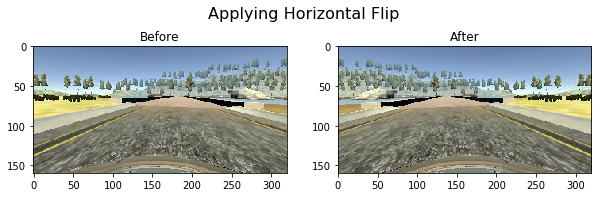

In [13]:
# Test da.flip()
img, steering = get_example_images(samples)
result_img, result_steering = da.flip(img['center'], steering, prob=1.0)
assert result_steering == steering * -1
compare_img(img['center'], result_img, 'Applying Horizontal Flip', (10,3))

Original steering angle:  0.0  After Shearing: 0.109


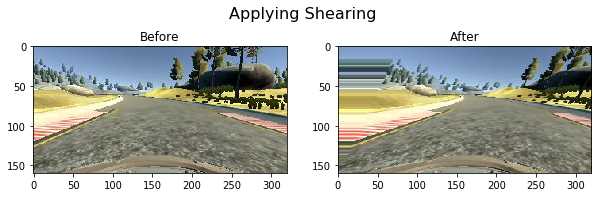

In [14]:
# Test da.rand_shear()
img, steering = get_example_images(samples)
result_img, result_steering = da.rand_shear(img['center'], steering, 45, prob=1.0)
print('Original steering angle: ', steering, " After Shearing: {:.3f}".format(result_steering))
compare_img(img['center'], result_img, 'Applying Shearing', (10,3))

Original steering angle:  0.0  After Shearing: 0.000


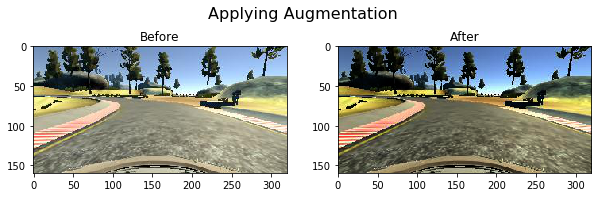

In [20]:
# Test da.augment_image()
img, steering = get_example_images(samples)
result_img, result_steering = da.augment_image(img['center'], steering)
print('Original steering angle: ', steering, " After Shearing: {:.3f}".format(result_steering))
compare_img(img['center'], result_img, 'Applying Augmentation', (10,3))

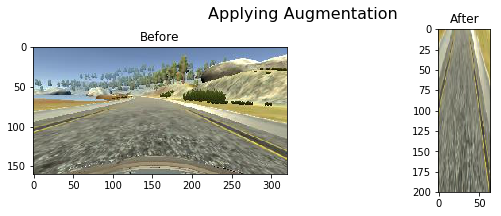

In [32]:
img, steering = get_example_images(samples)
result_img = da.crop_n_resize(img['center'], 75, 25, (64,200))
compare_img(img['center'], result_img, 'Applying Augmentation', (10,3))

In [29]:
# Test data pipeline
import datapipe as dp

batch_size = 32

samples = dp.read_data_csv(DATA_PATH, CSV_FILENAME)
gen = dp.sample_generator(samples, DATA_PATH, batch_size)
# plt.imshow(X_train[3])

AttributeError: module 'datapipe' has no attribute 'sample_generator'

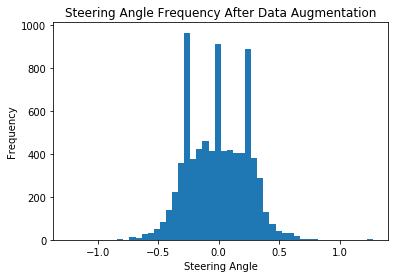

In [17]:
measurement = []
num_iter = int(len(samples)/batch_size)
for i in range(num_iter):
# for i in range(10):
    _, y_train = next(gen)
    measurement= np.append(measurement, y_train)
    
measurement = measurement.flatten()
n, bins, patches = plt.hist(measurement, 50, alpha=1)
plt.title('Steering Angle Frequency After Data Augmentation')
plt.ylabel('Frequency')
plt.xlabel('Steering Angle')
# plt.savefig('./img/data_freq_aft_aug.jpg')
plt.show()